## HiGHS example

In [4]:
from optiwindnet.api import WindFarmNetwork, Heuristic, MILP
from optiwindnet.importer import load_repository

load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\zlib1.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\abseil_dll.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\utf8_validity.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\re2.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\libprotobuf.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\highs.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\ortools.dll...


In [5]:
from pyomo import environ as pyo

In [ ]:
# Display figures as SVG in Jupyter notebooks
%config InlineBackend.figure_formats = ['svg']

### Initialize Triton

In [6]:
highser = pyo.SolverFactory('appsi_highs')
highser.available(), type(highser)

(True,
 pyomo.contrib.appsi.base.SolverFactoryClass.register.<locals>.decorator.<locals>.LegacySolver)

In [7]:
locations = load_repository()

### Optimize Triton

In [8]:
L = locations.triton
capacity = 8
wfn = WindFarmNetwork.upload_L(L=L, cables_capacity=capacity)

<Axes: >

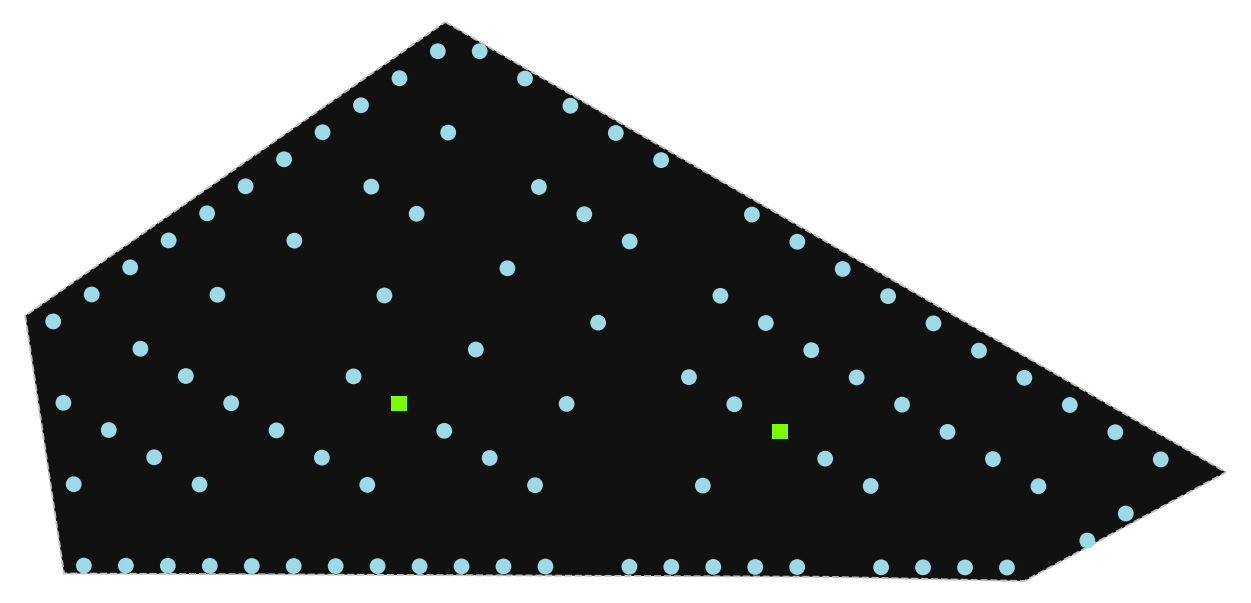

In [9]:
wfn.plot_L()

<Axes: >

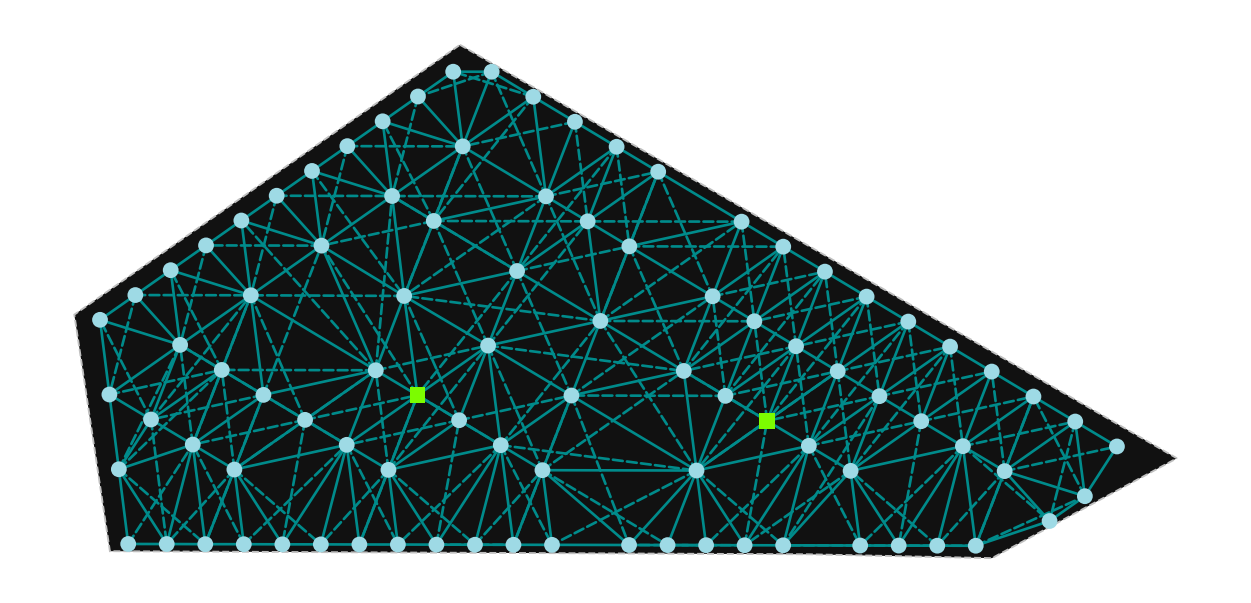

In [10]:
wfn.plot_A()

Initial heuristic solution to warm-start the solver:

<Axes: >

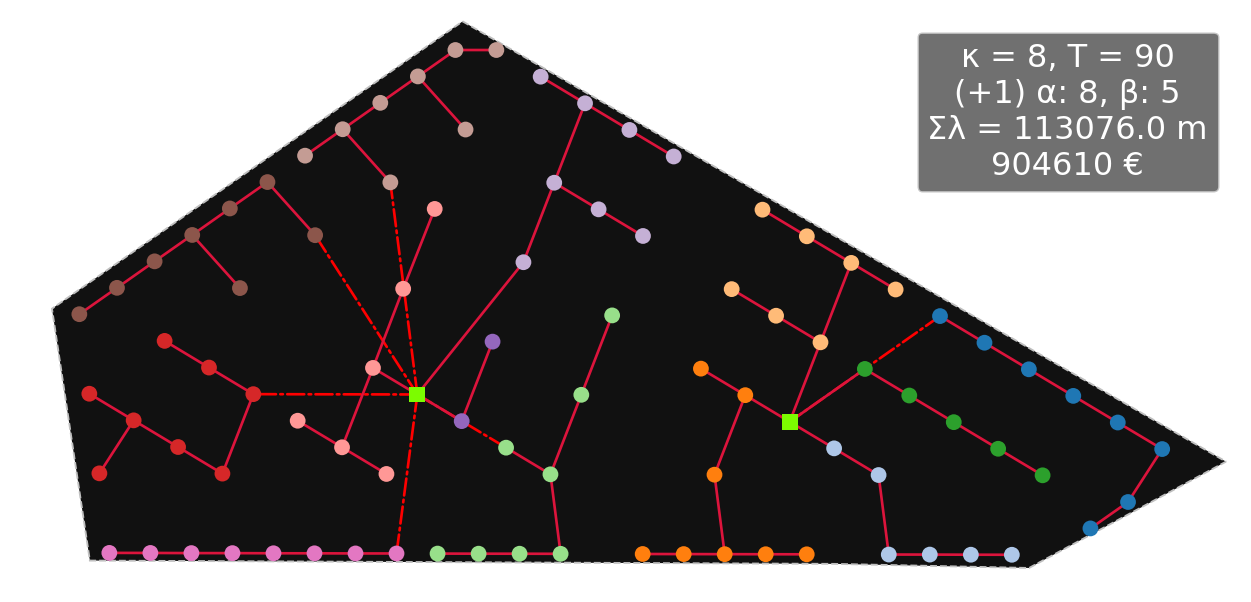

In [11]:
router_pre_solver = Heuristic(solver='EW')
res_pre_solver= wfn.optimize(router=router_pre_solver)
wfn.plot()

In [13]:
solver_options=dict(
    time_limit=60,  # timelimit?
    mip_rel_gap=0.005,  # mipgap?
    tee=True
)


model_options = {"gateXing_constraint": False,
                 "branching": True,
                 "gates_limit": False}

router = MILP(solver='highs', solver_options=solver_options, model_options=model_options, detour=True)
res = wfn.optimize(router=router)

S is not None and the model is warmed up with the available S.
Solving "triton": {R=2, T=90, κ=8}

Running HiGHS 1.10.0 (git hash: fd86653): Copyright (c) 2025 HiGHS under MIT licence terms
RUN!
ERROR:   getOptionIndex: Option "tee" is unknown
MIP  has 2708 rows; 1764 cols; 9840 nonzeros; 1764 integer variables (882 binary)
Coefficient ranges:
  Matrix [1e+00, 8e+00]
  Cost   [8e+02, 1e+04]
  Bound  [1e+00, 8e+00]
  RHS    [1e+00, 9e+01]
Presolving model
2708 rows, 1764 cols, 9840 nonzeros  0s
2344 rows, 1722 cols, 8787 nonzeros  0s

Solving MIP model with:
   2344 rows
   1722 cols (842 binary, 880 integer, 0 implied int., 0 continuous)
   8787 nonzeros

Src: B => Branching; C => Central rounding; F => Feasibility pump; H => Heuristic; L => Sub-MIP;
     P => Empty MIP; R => Randomized rounding; S => Solve LP; T => Evaluate node; U => Unbounded;
     z => Trivial zero; l => Trivial lower; u => Trivial upper; p => Trivial point; X => User solution

        Nodes      |    B&B Tree     

<Axes: >

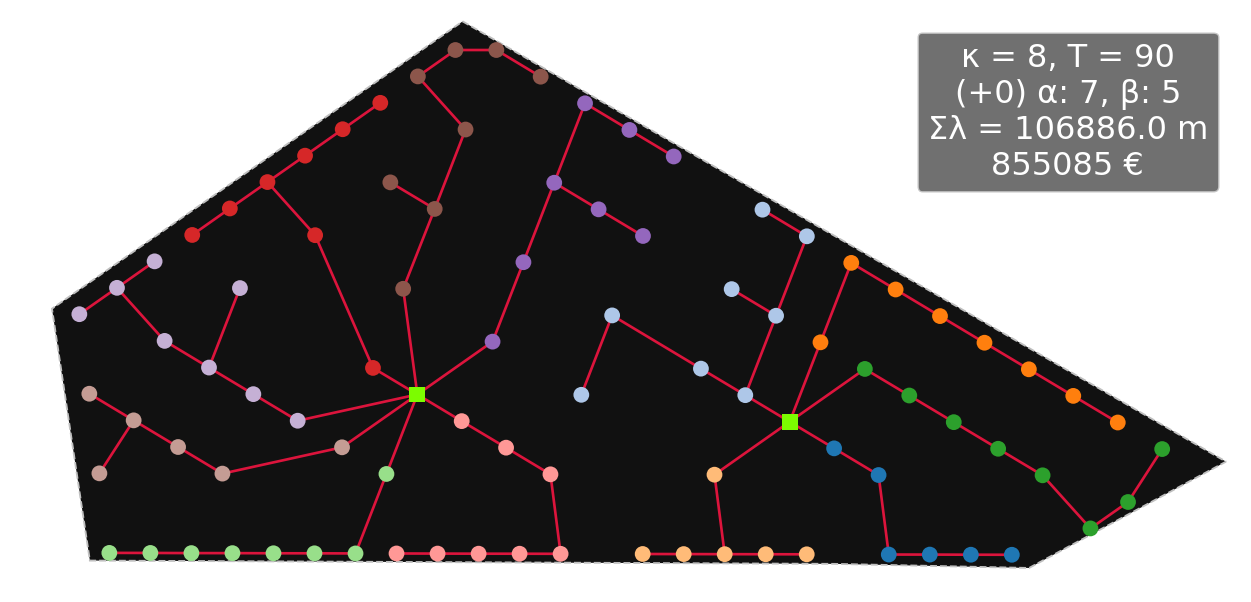

In [14]:
wfn.plot()